# Market Research for Automotive Industry

## 1. Problem Statement

We have been hired by the data science team at a renowned consulting firm. We've been assigned to a market research project for a major Chinese automotive company. Our client aims to enter our automobile market, and they have tasked us with analyzing the features of vehicles currently available in the market. With an extensive collection of models across various categories in their catalog, which are stratified into ranges based on regional preferences, they want to understand the characteristics of both high-end and low-end vehicles in our market. This will enable them to cater to a wide range of target audiences, aligning with market demand. Using this data, they also intend to accurately price the vehicles they will offer.

To achieve this, our data department has gathered prices and features of several vehicle models available in our market, along with their retail prices. They have compiled the following data dictionary:

| Variable Name   | Description                                                |
|-----------------|------------------------------------------------------------|
| car_ID          | Vehicle identification number in the database             |
| symboling       | Risk rating associated with the vehicle                   |
| CarName         | Vehicle's brand name                                      |
| fueltype        | Fuel type                                                  |
| aspiration      | Engine aspiration type                                    |
| doornumber      | Number of doors                                           |
| carbody         | Vehicle body type                                         |
| drivewheel      | Driver's wheel location                                   |
| enginelocation  | Engine location in the vehicle                            |
| wheelbase       | Wheelbase distance                                        |
| carlength       | Vehicle length                                            |
| carwidth        | Vehicle width                                             |
| carheight       | Vehicle height without load or occupants                 |
| curbweight      | Curb weight (vehicle weight without occupants or load)   |
| enginetype      | Engine type                                               |
| cylindernumber  | Number of cylinders in the engine                         |
| enginesize      | Engine displacement size                                  |
| fuelsystem      | Fuel system                                               |
| boreratio       | Bore-to-stroke ratio                                      |
| stroke          | Compression stroke ratio within the engine                |
| compressionratio| Compression ratio                                         |
| horsepower      | Vehicle horsepower (HP)                                   |
| peakrpm         | Maximum revolutions per minute supported by the engine   |
| citympg         | City fuel consumption in miles per gallon (MPG)          |
| highwaympg      | Highway fuel consumption in miles per gallon (MPG)       |
| price           | Vehicle price                                             |


Our Data Lead has advised us to thoroughly analyze the data, preprocess it appropriately, and design two predictive models: one for predicting prices and another for distinguishing between high-end and low-end vehicles, using the median price as the cutoff point. They would like to receive the prediction outputs in plain text format.

In addition to the detailed data exploration analysis, here are the two possible predictions they are interested in:

Classification Model: Implement a supervised learning classification model to categorize vehicle prices as either "affordable" or "expensive," using the median price as the cutoff point. You should utilize the provided data for this task.

Regression Model: Implement a supervised learning regression model to predict the final price of vehicles. You should use the provided data for this prediction task.

Both prediction outputs should be provided in plain text format.

## 2. Exploratory Data Analysis (EDA)

### 2.1 Data loading

In [31]:
# Libraries Used in the Document
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'./ML_cars.csv', index_col=False)
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


### 2.2 Basic Analysis

In [32]:
# Data Frame description
description_dataframe = df.describe(include='all')
print(description_dataframe)

            car_ID   symboling        CarName fueltype aspiration doornumber  \
count   205.000000  205.000000            205      205        205        205   
unique         NaN         NaN            147        2          2          2   
top            NaN         NaN  toyota corona      gas        std       four   
freq           NaN         NaN              6      185        168        115   
mean    103.000000    0.834146            NaN      NaN        NaN        NaN   
std      59.322565    1.245307            NaN      NaN        NaN        NaN   
min       1.000000   -2.000000            NaN      NaN        NaN        NaN   
25%      52.000000    0.000000            NaN      NaN        NaN        NaN   
50%     103.000000    1.000000            NaN      NaN        NaN        NaN   
75%     154.000000    2.000000            NaN      NaN        NaN        NaN   
max     205.000000    3.000000            NaN      NaN        NaN        NaN   

       carbody drivewheel enginelocatio

In [33]:
# Review of duplicates
print(df.shape[0])
df.drop_duplicates(inplace=True)
print(df.shape[0])


205
205


In [34]:
# Review of Null Data
null_dataframe = df.isnull().sum()
display(null_dataframe)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

```We can observe that the information is complete, and there is no need for variable imputation.```

### 2.3 Creating a Column to Differentiate Whether a Car is Expensive or Affordable

In [35]:
# Calculate the median of the prices
price_median = df['price'].median()
print(price_median)

# New column 'price_category' indicating whether a car is in the low or high price range
df['price_category'] = df['price'].apply(lambda x: 'Low Range' if x <= price_median else 'High Range')

# Displaying the firsts few rows of the DataFrame to verify the results
df[['price','price_category']].loc[40:45]

10295.0


,price,price_category
40,10295.0,Low Range
41,12945.0,High Range
42,10345.0,High Range
43,6785.0,Low Range
44,8916.5,Low Range
45,8916.5,Low Range


### 2.4 Box Plots of Numerical Features Grouped by Price Categories

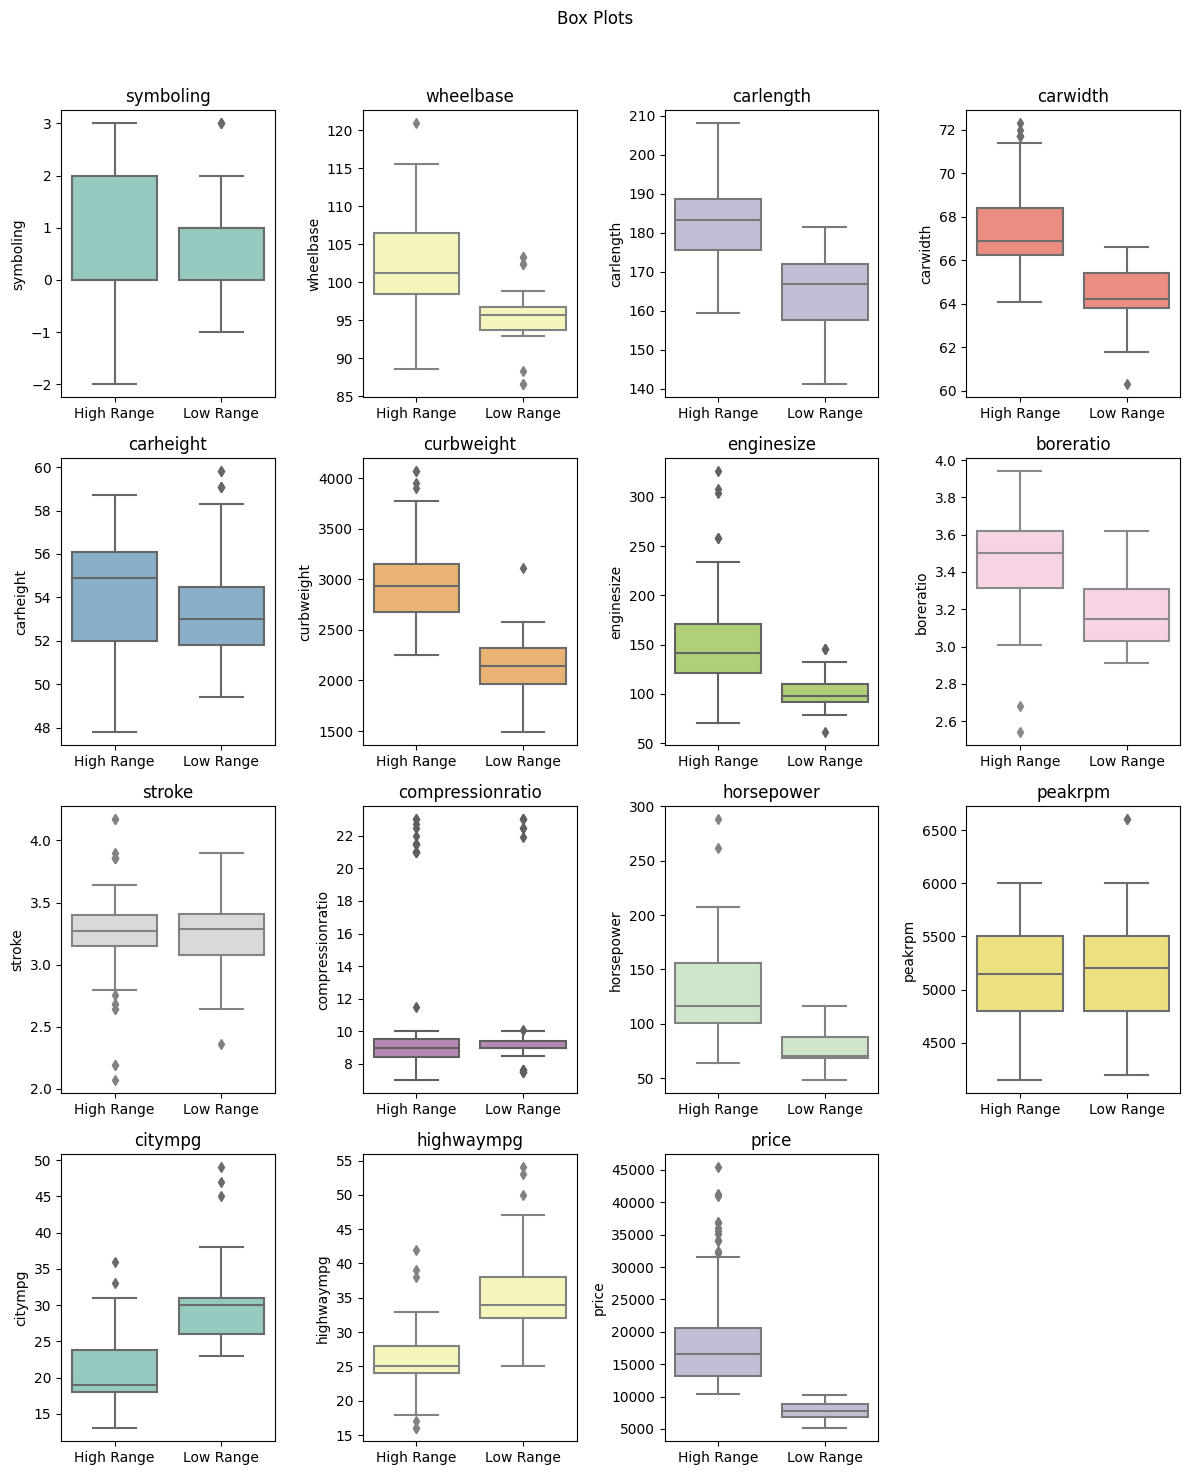

In [36]:
def plot_boxplots(df):
    # List of numerical features for which box plots will be created
    numerical_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                          'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                          'peakrpm', 'citympg', 'highwaympg', 'price']
    
    # Generate a color palette for the plots
    colors = sns.color_palette("Set3", n_colors=len(numerical_features))
    
    # Create a 4x4 grid of subplots for box plots
    fig, axes = plt.subplots(4, 4, figsize=(12, 15))
    fig.suptitle('Box Plots')
    axes = axes.flatten()
    
    # Iterate through each numerical feature and create a box plot
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x="price_category", y=feature, data=df, ax=axes[i], palette=[colors[i]])
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        
    # Remove the last subplot which is not used
    fig.delaxes(axes[-1])
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid title overlap

# Plot box plots
plot_boxplots(df)
plt.show()



Note: It appears that there might be an outlier in the compression ratio, but the significant difference is due to the engine type change.

### 2.5 Correlation Heatmap of Numerical Features

In [37]:
def plot_corre_heatmap(corr):
    '''
    Define a function to help us plot a correlation heatmap
    '''
    # Set the size of the heatmap figure
    plt.figure(figsize=(12, 10))
    
    # Create a heatmap of correlation matrix
    sns.heatmap(corr, cbar=True, square=False, annot=True, fmt='.2f',
                annot_kws={'size': 12}, cmap='coolwarm')
    
    # Rotate x-axis and y-axis labels for better readability
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    
    # Adjust the ylim to improve visualization
    bottom, top = plt.ylim()  # discover the values for bottom and top
    bottom += 0.5  # Add 0.5 to the bottom
    top -= 0.5  # Subtract 0.5 from the top
    plt.ylim(bottom, top)  # update the ylim(bottom, top) values
    
    # Display the heatmap
    plt.show()


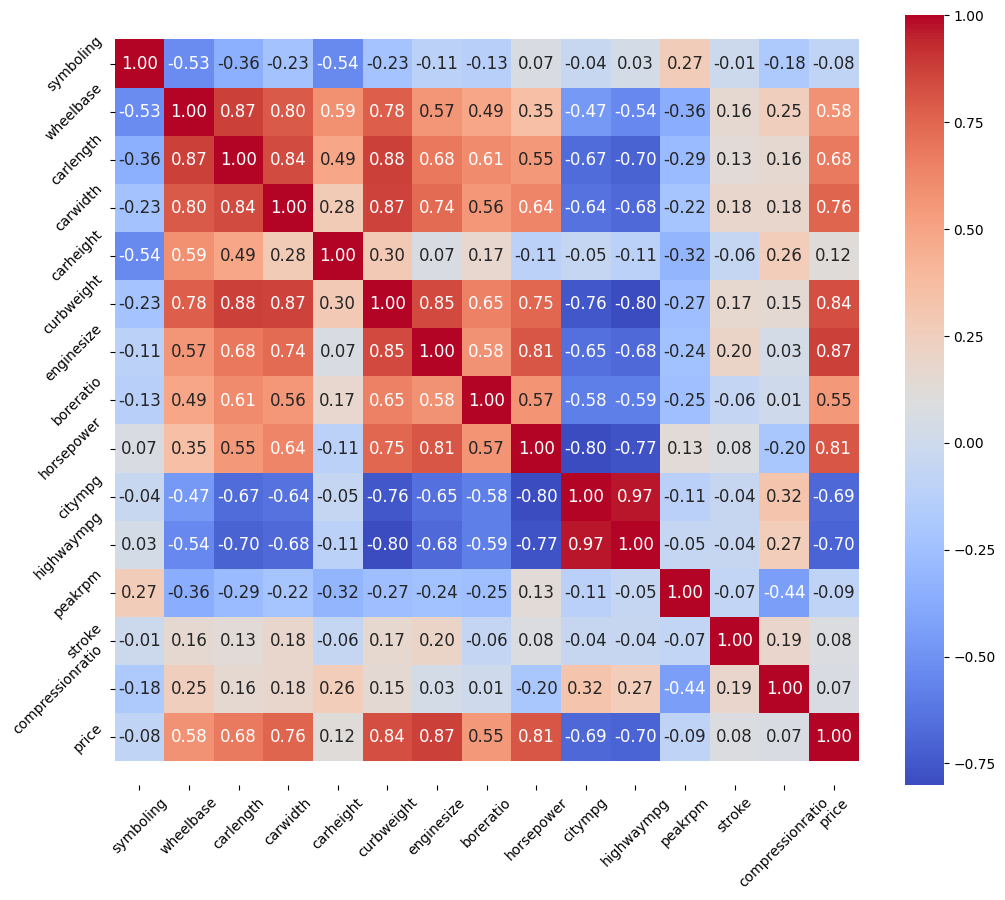

In [38]:
numerical_cols = ['symboling', 'wheelbase', 'carlength','carwidth','carheight',
                  'curbweight','enginesize','boreratio','horsepower',
                  'citympg','highwaympg','peakrpm','stroke','compressionratio','price']
corr = df[numerical_cols].corr()
plot_corre_heatmap(corr)

### 2.6 Count Plots of Categorical Variables Grouped by Price Category

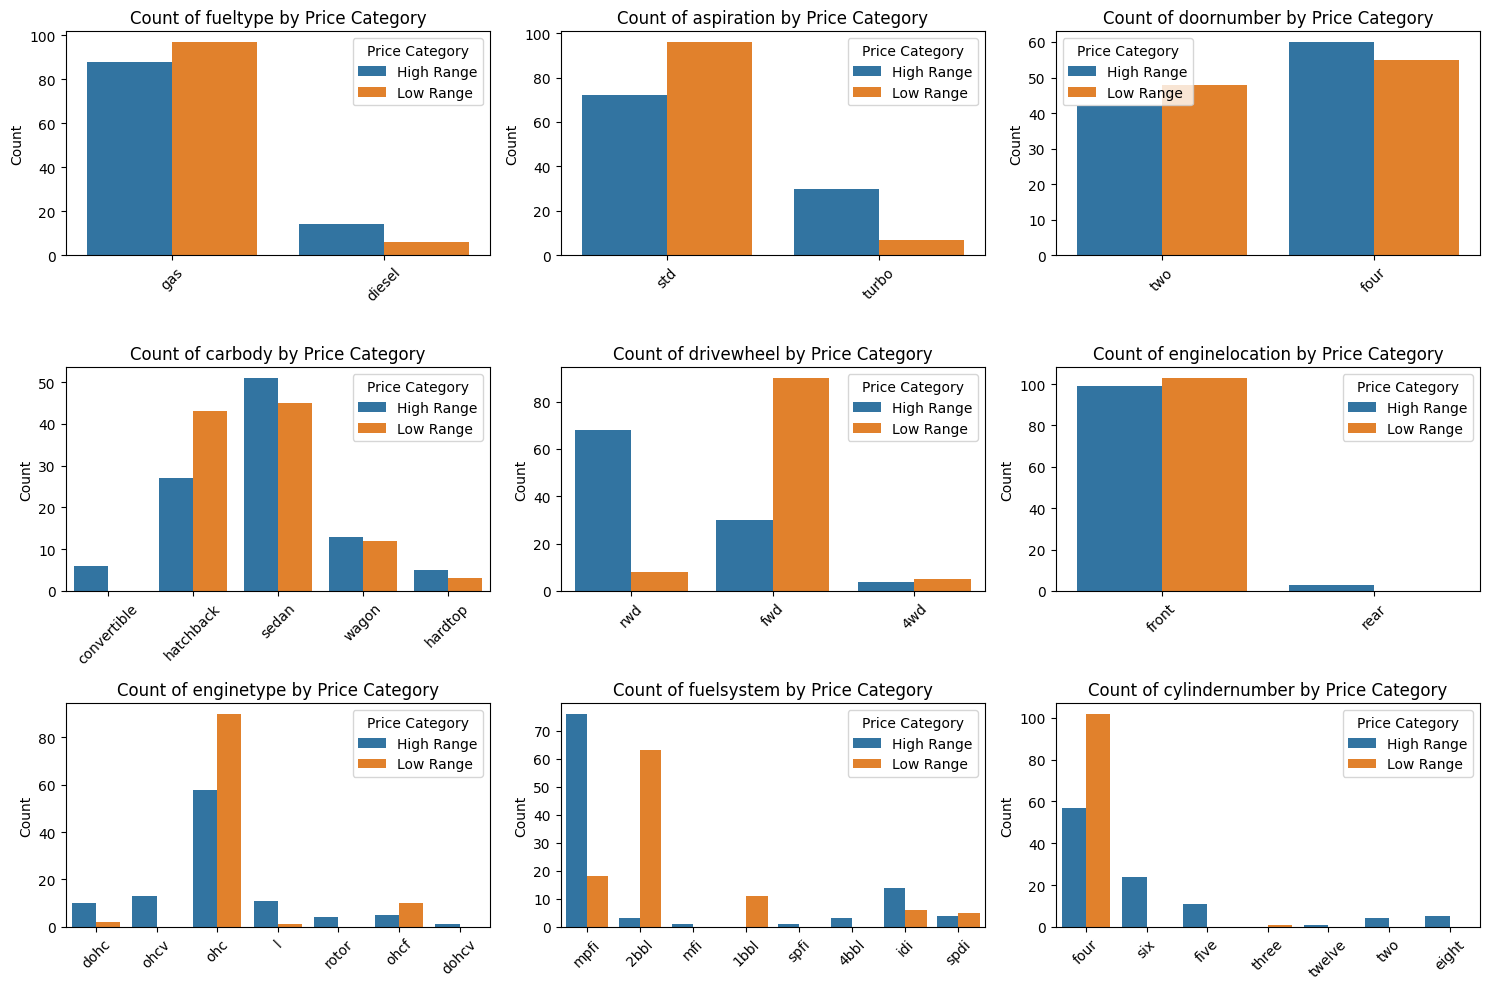

In [39]:
# Select categorical variables for the count plots
categorical_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'cylindernumber']

# Calculate the number of rows and columns for the subplots
num_rows = (len(categorical_vars) + 1) // 3  # Adjusted to 3 columns
num_cols = 3

# Create subplots for categorical variables grouped by 'price_category'
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=var, hue='price_category', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Count of {var} by Price Category')
    axes[row, col].set_xlabel(None)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Price Category')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout and spacing
plt.tight_layout()
plt.show()

## 3. Data Preprocessing:

### 3.1 Removing unnecessary data

After reviewing the results from the EDA, we will proceed to eliminate the variables that do not provide valuable information for classifying the vehicles, as they do not exhibit differentiation across the different ranges.

In [40]:
# Remove with low correlation
df.drop(['peakrpm','stroke','compressionratio'],axis=1,inplace=True)

In [41]:
# Drop columns with high correlations
df.drop(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'highwaympg'], axis=1, inplace=True)

In [42]:
# we use only the important variables for the distinction 
df['is_convertible'] = df['carbody'] == 'convertible'
df['is_rear'] = df['enginelocation'] == 'rear'

In [43]:
# Define a dictionary to map cylinder number values to their corresponding integers
cylinder_mapping = {'four': 4, 'eight': 8, 'five': 5, 'six': 6, 'three': 3, 'twelve': 12, 'two': 2}

# Replace 'cylindernumber' values using the defined mapping
df['cylindernumber'] = df['cylindernumber'].replace(cylinder_mapping)

# Replace 'price_category' values with binary values
df['price_category'] = df['price_category'].replace({'Low Range': 0, 'High Range': 1})


In [44]:
# removing categorical columns with low correlation on the price
df.drop(['CarName','doornumber','carbody','drivewheel','enginetype','fuelsystem','enginelocation'],axis=1,inplace=True)

### 3.2 Dummies for the categorical data

In [45]:
df = pd.get_dummies(df,columns=['fueltype','aspiration'],drop_first=True)
df

,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price,price_category,is_convertible,is_rear,fueltype_gas,aspiration_turbo
0,2548,4,130,3.47,111,21,13495.0,1,True,False,True,False
1,2548,4,130,3.47,111,21,16500.0,1,True,False,True,False
2,2823,6,152,2.68,154,19,16500.0,1,False,False,True,False
3,2337,4,109,3.19,102,24,13950.0,1,False,False,True,False
4,2824,5,136,3.19,115,18,17450.0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,4,141,3.78,114,23,16845.0,1,False,False,True,False
201,3049,4,141,3.78,160,19,19045.0,1,False,False,True,True
202,3012,6,173,3.58,134,18,21485.0,1,False,False,True,False
203,3217,6,145,3.01,106,26,22470.0,1,False,False,False,True


In [46]:
df.to_csv('clean_model.csv',index=False)

## 4. Model Building SVM

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

data = pd.read_csv(r'./clean_model.csv')
data

,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price,price_category,is_convertible,is_rear,fueltype_gas,aspiration_turbo
0,2548,4,130,3.47,111,21,13495.0,1,True,False,True,False
1,2548,4,130,3.47,111,21,16500.0,1,True,False,True,False
2,2823,6,152,2.68,154,19,16500.0,1,False,False,True,False
3,2337,4,109,3.19,102,24,13950.0,1,False,False,True,False
4,2824,5,136,3.19,115,18,17450.0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,4,141,3.78,114,23,16845.0,1,False,False,True,False
201,3049,4,141,3.78,160,19,19045.0,1,False,False,True,True
202,3012,6,173,3.58,134,18,21485.0,1,False,False,True,False
203,3217,6,145,3.01,106,26,22470.0,1,False,False,False,True


In [48]:
# Separate the data into features (X) and target variable (y) for the model
X = data.drop(['price_category', 'price'], axis=1)  # Features excluding 'price_category' and 'price'
y = data['price_category']  # Target variable 'price_category'


In [49]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [50]:
from sklearn.preprocessing import StandardScaler

# Escalamos los valores del set de train y los de test 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [51]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=15)
classifier.fit(X_train, y_train)

SVC(random_state=15)

In [52]:
Y_Pred = classifier.predict(X_test)

## 5. Model Evaluation: SVM

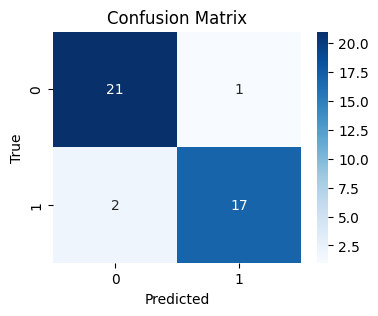

In [53]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_Pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
print(classification_report(y_test, Y_Pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.94      0.89      0.92        19

    accuracy                           0.93        41
   macro avg       0.93      0.92      0.93        41
weighted avg       0.93      0.93      0.93        41



## 6. Model Building: Linear Regression

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

data = pd.read_csv(r'./clean_model.csv')
data

,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price,price_category,is_convertible,is_rear,fueltype_gas,aspiration_turbo
0,2548,4,130,3.47,111,21,13495.0,1,True,False,True,False
1,2548,4,130,3.47,111,21,16500.0,1,True,False,True,False
2,2823,6,152,2.68,154,19,16500.0,1,False,False,True,False
3,2337,4,109,3.19,102,24,13950.0,1,False,False,True,False
4,2824,5,136,3.19,115,18,17450.0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,4,141,3.78,114,23,16845.0,1,False,False,True,False
201,3049,4,141,3.78,160,19,19045.0,1,False,False,True,True
202,3012,6,173,3.58,134,18,21485.0,1,False,False,True,False
203,3217,6,145,3.01,106,26,22470.0,1,False,False,False,True


In [56]:
# Separate the data into features (X) and target variable (y) for the model
X = data.drop(['price_category', 'price'], axis=1).values  # Features excluding 'price_category' and 'price'
y = data['price']  # Target variable 'price'

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

# Print the shape of the split datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (164, 10)
y_train shape: (164,)
X_test shape: (41, 10)
y_test shape: (41,)


In [57]:
# Create an instance of the LinearRegression model
linear_model = LinearRegression()

# Train (fit) the model on the data
linear_model.fit(X, y)


LinearRegression()

In [58]:
print("The slope obtained with Sklearn is:\n", linear_model.coef_)
print("The y-intercept obtained with Sklearn is:\n", linear_model.intercept_)


The slope obtained with Sklearn is:
 [ 5.64978088e+00  1.66460636e+01  7.21925731e+01 -2.17611634e+03
  4.05296077e+01 -4.32507295e+01  2.51128338e+03  1.09762646e+04
 -1.87562702e+03 -7.57154281e+02]
The y-intercept obtained with Sklearn is:
 -4684.318457506608


## 7. Model Evaluation:Linear Regression

In [59]:
# Predict the output labels (y) for both the training and testing subsets
y_train_pred = linear_model.predict(X_train)  # Predictions for the training subset
y_test_pred = linear_model.predict(X_test)    # Predictions for the testing subset

from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error and R-squared for the testing predictions
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the Mean Squared Error and R-squared values
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 12196836.57
R-squared: 0.85


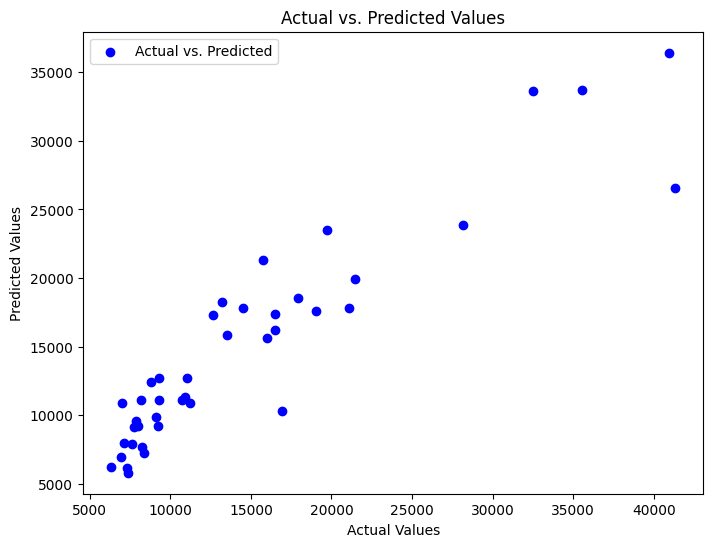

In [60]:
plt.figure(figsize=(8, 6))

# Scatter plot comparing actual vs. predicted values
plt.scatter(y_test, y_test_pred, c='blue', label='Actual vs. Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


## 8. Conclusions

In this project, we developed a regression model to predict vehicle prices and an SVM classification model to categorize vehicles into price categories. The analysis involved thorough exploration of the dataset, preprocessing of data, and training and evaluation of models.

For the regression model, we obtained a Mean Squared Error (MSE) of 12,196,836.57 and an R-squared value of 0.85 on the testing subset. The relatively low MSE indicates that the model's predictions are on average close to the actual prices, and the high R-squared value suggests that a significant portion of the variability in the target variable is explained by the model.

On the other hand, the SVM classification model achieved an accuracy of 0.93 on the testing subset. This indicates that the model is highly effective in categorizing vehicles into price categories.

In conclusion, both the regression and SVM classification models demonstrated promising results in their respective tasks. The regression model provides accurate predictions of vehicle prices, while the SVM classification model effectively distinguishes between different price categories. These models could provide valuable insights for the automotive company's pricing and market strategy decisions.

It's important to note that further optimizations and refinements could be explored to enhance the models' performance and generalization to real-world scenarios.